In [13]:
import csv
import datetime
import math
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


1.What datetime range does your data cover?  How many rows are there total?

In [2]:
import csv

file = "trip_data_2.csv"
date_col = "pickup_datetime"

with open(file, newline="", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    total = 0
    min_s = None
    max_s = None

    for row in reader:
        total += 1
        s = row[date_col]
        if not s:
            continue
        if (min_s is None) or (s < min_s):
            min_s = s
        if (max_s is None) or (s > max_s):
            max_s = s

print(f"Column: {date_col}")
print(f"Total Rows: {total:,}")
print(f"Date Range: {min_s} to {max_s}")


Column: pickup_datetime
Total Rows: 13,990,176
Date Range: 2013-02-01 00:00:00 to 2013-02-28 23:59:59


2. What are the field names?  Give descriptions for each field.

In [3]:
with open("trip_data_2.csv", newline='', encoding='utf-8') as f:
    headers = next(csv.reader(f))

print("Field Names and Descriptions:\n")

descriptions = {
    "medallion": "Taxi unique ID",
    "hack_license": "Driver license ID",
    "vendor_id": "Trip vendor/company ID",
    "rate_code": "Fare rate type (1=Standard, 2=JFK, etc.)",
    "store_and_fwd_flag": "Trip stored before sending (Y/N)",
    "pickup_datetime": "Trip start datetime",
    "dropoff_datetime": "Trip end datetime",
    "passenger_count": "Number of passengers",
    "trip_time_in_secs": "Trip duration in seconds",
    "trip_distance": "Trip distance in miles",
    "pickup_longitude": "Pickup longitude",
    "pickup_latitude": "Pickup latitude",
    "dropoff_longitude": "Dropoff longitude",
    "dropoff_latitude": "Dropoff latitude"
}

for h in headers:
    print(f"{h}: {descriptions.get(h, 'No description available')}")


Field Names and Descriptions:

medallion: Taxi unique ID
hack_license: Driver license ID
vendor_id: Trip vendor/company ID
rate_code: Fare rate type (1=Standard, 2=JFK, etc.)
store_and_fwd_flag: Trip stored before sending (Y/N)
pickup_datetime: Trip start datetime
dropoff_datetime: Trip end datetime
passenger_count: Number of passengers
trip_time_in_secs: Trip duration in seconds
trip_distance: Trip distance in miles
pickup_longitude: Pickup longitude
pickup_latitude: Pickup latitude
dropoff_longitude: Dropoff longitude
dropoff_latitude: Dropoff latitude


3.Give some sample data for each field.

In [4]:
file = "trip_data_2.csv"
line_count = 0

with open(file, newline='', encoding='utf-8') as data_file:
    csv_rows = csv.reader(data_file)
    for entry in csv_rows:
        print(entry)
        line_count += 1
        if line_count == 11:   # show header + first 10 records
            break


['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
['1B5C0970F2AE8CFFBA8AE4584BEAED29', 'D961332334524990D1BBD462E2EFB8A4', 'CMT', '1', 'N', '2013-02-08 23:35:14', '2013-02-08 23:42:58', '1', '463', '.80', '-73.992439', '40.724487', '-73.984421', '40.718903']
['B42249AE16E2B8E556F1CB1F940D6FB4', 'D4BB308D1F3FCB3434D9DB282CDC93D7', 'CMT', '1', 'N', '2013-02-07 12:20:16', '2013-02-07 12:50:27', '4', '1810', '3.10', '-73.989494', '40.769588', '-73.990303', '40.737347']
['890699222C47C09FBC898758CEC69762', '6318C3AEC02248928C3345B5805EB905', 'CMT', '1', 'N', '2013-02-08 08:56:54', '2013-02-08 08:59:43', '1', '168', '1.00', '-73.963036', '40.799141', '-73.972168', '40.786446']
['74B7D835C2CD98606D5256DA8A38E045', 'D5E278C918256D1F97680A1F04D290E0', 'CMT', '1', 'N', '2013-02-08 09:37:02', '20

4. What MySQL data types / len would you need to store each of the fields?
    a.int(xx), varchar(xx),date,datetime,bool, decimal(m,d)


In [5]:
fields_mysql = {
    "medallion": "CHAR(32)",
    "hack_license": "CHAR(32)",
    "vendor_id": "VARCHAR(10)",
    "rate_code": "TINYINT",
    "store_and_fwd_flag": "CHAR(1)",
    "pickup_datetime": "DATETIME",
    "dropoff_datetime": "DATETIME",
    "passenger_count": "TINYINT",
    "trip_time_in_secs": "INT",
    "trip_distance": "DECIMAL(6,2)",
    "pickup_longitude": "DECIMAL(9,6)",
    "pickup_latitude": "DECIMAL(9,6)",
    "dropoff_longitude": "DECIMAL(9,6)",
    "dropoff_latitude": "DECIMAL(9,6)"
}

print("MySQL Data Type Recommendations:\n")
for f, t in fields_mysql.items():
    print(f"{f}: {t}")


MySQL Data Type Recommendations:

medallion: CHAR(32)
hack_license: CHAR(32)
vendor_id: VARCHAR(10)
rate_code: TINYINT
store_and_fwd_flag: CHAR(1)
pickup_datetime: DATETIME
dropoff_datetime: DATETIME
passenger_count: TINYINT
trip_time_in_secs: INT
trip_distance: DECIMAL(6,2)
pickup_longitude: DECIMAL(9,6)
pickup_latitude: DECIMAL(9,6)
dropoff_longitude: DECIMAL(9,6)
dropoff_latitude: DECIMAL(9,6)


5.What is the geographic range of your data (min/max - X/Y)?
   a.Plot this (approximately on a map)

NYC Longitude (X): -74.294418 to -73.606659
NYC Latitude (Y):  40.469387 to 40.985477


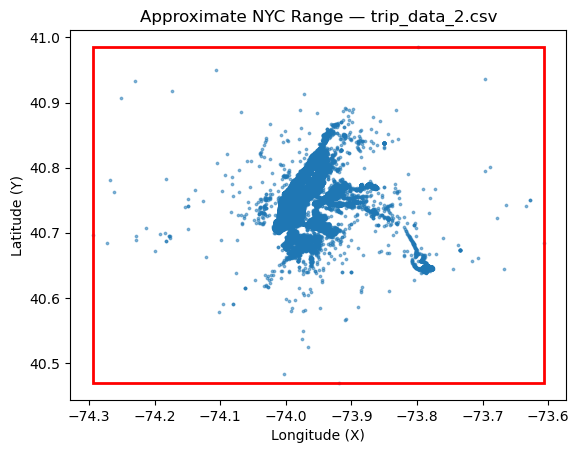

In [ ]:
file = "trip_data_2.csv"

NYC_LON_MIN, NYC_LON_MAX = -74.3, -73.6
NYC_LAT_MIN, NYC_LAT_MAX = 40.4, 41.0

with open(file, newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)
    lon_i = header.index("pickup_longitude")
    lat_i = header.index("pickup_latitude")

    lon_min, lon_max = 1e9, -1e9
    lat_min, lat_max = 1e9, -1e9
    xs, ys = [], []

    for i, row in enumerate(reader):
        try:
            x, y = float(row[lon_i]), float(row[lat_i])
        except:
            continue
        if NYC_LON_MIN <= x <= NYC_LON_MAX and NYC_LAT_MIN <= y <= NYC_LAT_MAX:
            xs.append(x)
            ys.append(y)
            if x < lon_min: lon_min = x
            if x > lon_max: lon_max = x
            if y < lat_min: lat_min = y
            if y > lat_max: lat_max = y
        if i > 200000:
            break

print(f"NYC Longitude (X): {lon_min:.6f} to {lon_max:.6f}")
print(f"NYC Latitude (Y):  {lat_min:.6f} to {lat_max:.6f}")

fig, ax = plt.subplots()
ax.scatter(xs, ys, s=3, alpha=0.5)
ax.add_patch(Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, fill=False, lw=2, color='red'))
ax.set_xlabel("Longitude (X)")
ax.set_ylabel("Latitude (Y)")
ax.set_title("Approximate NYC Range — trip_data_2.csv")
plt.show()




a.Draw a histogram of the trip distances binned anyway you see fit.

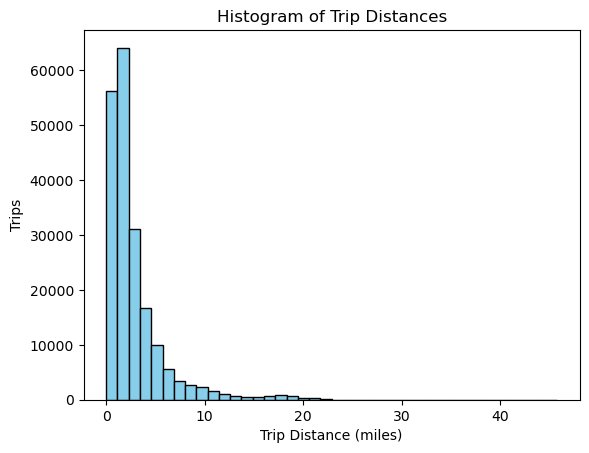

In [9]:
d = []
with open("trip_data_2.csv", newline='', encoding='utf-8') as f:
    r = csv.reader(f)
    h = next(r)
    i = h.index("trip_distance")
    for j, row in enumerate(r):
        try:
            x = float(row[i])
            if 0 < x < 50: d.append(x)
        except: pass
        if j > 200000: break

plt.hist(d, bins=40, color='skyblue', edgecolor='black')
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Trips")
plt.title("Histogram of Trip Distances")
plt.show()


6.What is the average overall computed trip distance? (You should use Haversine Distance)


In [10]:
from math import radians, sin, cos, sqrt, atan2

file = "trip_data_2.csv"
R = 3959  # Earth radius in miles
total = 0
count = 0

with open(file, newline='', encoding='utf-8') as f:
    r = csv.reader(f)
    h = next(r)
    i1, j1 = h.index("pickup_latitude"), h.index("pickup_longitude")
    i2, j2 = h.index("dropoff_latitude"), h.index("dropoff_longitude")

    for k, row in enumerate(r):
        try:
            lat1, lon1 = map(float, (row[i1], row[j1]))
            lat2, lon2 = map(float, (row[i2], row[j2]))
            if not (40 <= lat1 <= 42 and -75 <= lon1 <= -73): continue
            if not (40 <= lat2 <= 42 and -75 <= lon2 <= -73): continue
            dlat = radians(lat2 - lat1)
            dlon = radians(lon2 - lon1)
            a = sin(dlat/2)**2 + cos(radians(lat1))*cos(radians(lat2))*sin(dlon/2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            total += R * c
            count += 1
        except: pass
        if k > 200000: break

print(f"Average Haversine trip distance: {total/count:.2f} miles")


Average Haversine trip distance: 2.05 miles


7. What are the distinct values for each field? (If applicable)

In [11]:
file = "trip_data_2.csv"

fields = ["vendor_id", "rate_code", "store_and_fwd_flag", "passenger_count"]
distinct = {f: set() for f in fields}

with open(file, newline='', encoding='utf-8') as f:
    r = csv.DictReader(f)
    for i, row in enumerate(r):
        for f in fields:
            v = row[f].strip()
            if v:
                distinct[f].add(v)
        if i > 200000:  # limit for speed
            break

print("Distinct Values (sampled):\n")
for f in distinct:
    print(f"{f}: {sorted(list(distinct[f]))}")


Distinct Values (sampled):

vendor_id: ['CMT', 'VTS']
rate_code: ['1', '2', '3', '4', '5']
store_and_fwd_flag: ['N', 'Y']
passenger_count: ['0', '1', '2', '3', '4', '5', '6']


8. For other numeric types besides lat and lon, what are the min and max values?


In [12]:
file = "trip_data_2.csv"

nums = ["trip_distance", "trip_time_in_secs", "passenger_count"]
vals = {f: {"min": float("inf"), "max": float("-inf")} for f in nums}

with open(file, newline='', encoding='utf-8') as f:
    r = csv.DictReader(f)
    for i, row in enumerate(r):
        for f in nums:
            try:
                x = float(row[f])
                if x < vals[f]["min"]: vals[f]["min"] = x
                if x > vals[f]["max"]: vals[f]["max"] = x
            except: pass
        if i > 200000: break

print("Min/Max Values (sampled):\n")
for f in vals:
    print(f"{f}: min={vals[f]['min']}, max={vals[f]['max']}")


Min/Max Values (sampled):

trip_distance: min=0.0, max=63.73
trip_time_in_secs: min=0.0, max=9120.0
passenger_count: min=0.0, max=6.0


9.Create a chart which shows the average number of passengers each hour of the day. (X axis should have 24 hours)

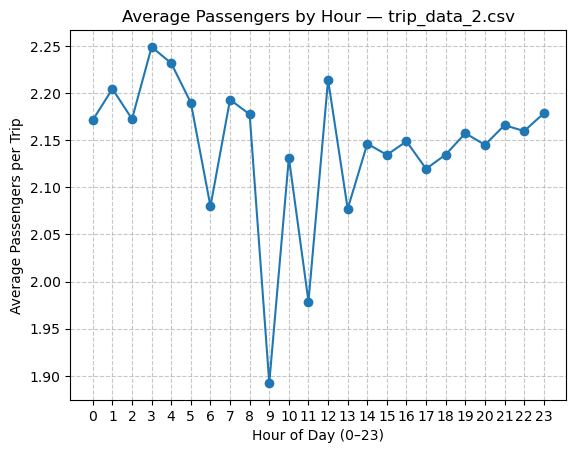

In [14]:
hour_sum = [0]*24
hour_count = [0]*24

with open(file, newline='', encoding='utf-8') as f:
    r = csv.DictReader(f)
    for i, row in enumerate(r):
        try:
            dt = datetime.strptime(row["pickup_datetime"], "%Y-%m-%d %H:%M:%S")
            h = dt.hour
            p = int(row["passenger_count"])
            hour_sum[h] += p
            hour_count[h] += 1
        except: pass
        if i > 200000: break

avg = [hour_sum[i]/hour_count[i] if hour_count[i] else 0 for i in range(24)]

plt.plot(range(24), avg, marker='o')
plt.xticks(range(24))
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Passengers per Trip")
plt.title("Average Passengers by Hour — trip_data_2.csv")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

10.Create a new CSV file which has only one out of every thousand rows.

In [15]:
file_in = "trip_data_2.csv"
file_out = "trip_data_2_sample.csv"

with open(file_in, newline='', encoding='utf-8') as fin, open(file_out, 'w', newline='', encoding='utf-8') as fout:
    r = csv.reader(fin)
    w = csv.writer(fout)
    header = next(r)
    w.writerow(header)
    for i, row in enumerate(r):
        if i % 1000 == 0:
            w.writerow(row)

print("New CSV created:", file_out)


New CSV created: trip_data_2_sample.csv


11.Repeat step 9 with the reduced dataset and compare the two charts.


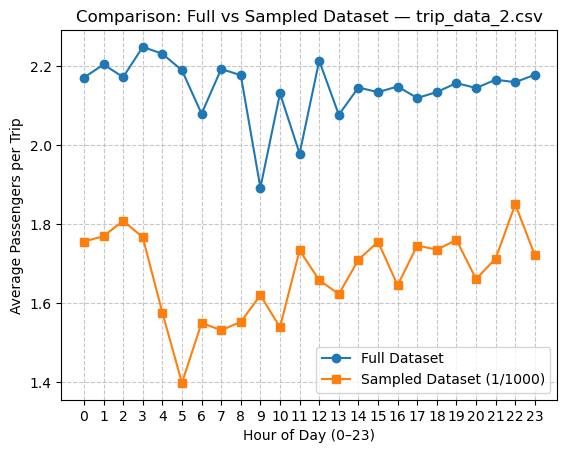

In [16]:
file = "trip_data_2_sample.csv"
hour_sum = [0]*24
hour_count = [0]*24

with open(file, newline='', encoding='utf-8') as f:
    r = csv.DictReader(f)
    for i, row in enumerate(r):
        try:
            dt = datetime.strptime(row["pickup_datetime"], "%Y-%m-%d %H:%M:%S")
            h = dt.hour
            p = int(row["passenger_count"])
            hour_sum[h] += p
            hour_count[h] += 1
        except: pass

avg_sample = [hour_sum[i]/hour_count[i] if hour_count[i] else 0 for i in range(24)]

plt.plot(range(24), avg, marker='o', label="Full Dataset")
plt.plot(range(24), avg_sample, marker='s', label="Sampled Dataset (1/1000)")
plt.xticks(range(24))
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Passengers per Trip")
plt.title("Comparison: Full vs Sampled Dataset — trip_data_2.csv")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
